In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = 0
p = 1

def prob(q):
    return np.exp(-0.5*q*q) / np.sqrt(2 * np.pi)

def dprob(q):
    return - q * np.exp(-0.5*q*q) / np.sqrt(2 * np.pi)

def U(q):
    return 0.5 *q * q + 0.5*np.log(2*np.pi)

def dU(q):
    return q

def timestep_euler(q,p,eps,m):
    q_new = q + eps*p/m
    p_new = p - eps*dU(q)
    return q_new, p_new

def timestep_euler_mod(q,p,eps,m):
    p_new = p - eps*dU(q)
    q_new = q + eps*p_new/m
    return q_new, p_new

def timestep_leapfrog(q,p,eps,m):
    p_new = p - eps*dU(q)/2
    q_new = q + eps*p_new/m
    p_new = p_new - eps*dU(q_new)/2
    return q_new, p_new
    

In [3]:
q_next = q
p_next = p
eps = 0.3
qs, ps = [], []
for i in range(20):
    qs.append(q_next)
    ps.append(p_next)
    q_next, p_next = timestep_leapfrog(q_next,p_next,eps,1)

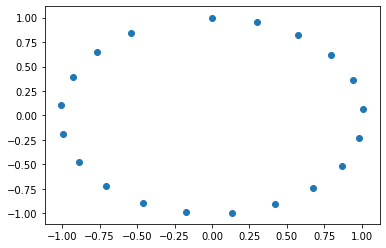

In [4]:
plt.scatter(qs,ps)

In [5]:
def U(q,cov):
    return 0.5 * q @ (np.linalg.pinv(cov) @ q)

def dU(q):
    return np.linalg.pinv(cov) @ q

def K(p,m=1):
    return np.sum(p*p/m)/2

def timestep_leapfrog(q,p,eps,m):
    p_new = p - eps*dU(q)/2
    q_new = q + eps*p_new/m
    p_new = p_new - eps*dU(q_new)/2
    return q_new, p_new

def HMC_Proposal(q_curr,p_curr,L,eps):
    q_new,p_new = q_curr, p_curr
    for i in range(L):
        q_new, p_new = timestep_leapfrog(q_new,p_new,eps,1)
    return q, p

def acceptance(q_curr,p_curr,q_new,p_new):
    prob = np.exp(U(q_curr) + K(p_curr) - U(q_new) - K(p_new))
    return prob